<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Logistic Regression with Python</font></h1>

In this notebook, you will learn Logist Regression, and then, you'll create a model with telecommunications data to predict when its customers will leave for a competitor, so that you can take some action to retain the customer.


<a id="ref1"></a>
## What is different between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it isn’t the best tool for predicting the class of an observed data point. In order to estimate a classification, we need some sort of guidance on what would be the **most probable class** for that data point. For this, we use **Logistic Regression**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
Linear regression finds a function that relates a continuous dependent variable, _y_, to some predictors (independent variables _x1_, _x2_, etc.). Simple linear regression assumes a function of the form:
<br><br>
$$
y = w0 + w1 * x1 + w2 * x2 +...
$$
<br>
and finds the values of _w0_, _w1_, _w2_, etc. The term _w0_ is the "intercept" or "constant term" :
<br><br>
$$
Y = W^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, _y_, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Despite the name logistic _regression_, it is actually a __probabilistic classification__ model. Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function:

$$
ℎ_w(𝑥) = \frac {e^{(w0 + w1 * x1 + w2 * x2 +...)}}{1 + e^{(w0 + w1 * x1 + w2 * x2 +...)}}
$$
Or:
$$
p(X) = ProbabilityOfaClass =  P(Y=1|X) = 𝜎({W^TX}) = \frac{e^{W^TX}}{1+e^{W^TX}} = exp({W^TX}) / (1+exp({W^TX}))  
$$
Or:
$$
Logit (ProbabilityOfaClass) = log(oddRatio) = log(\frac{p(X)}{1-p(X)}) = w0 + w1 * x1 + w2 * x2 +...
$$
which produces p-values between 0 (as y approaches minus infinity) and 1 (as y approaches plus infinity). This now becomes a special kind of non-linear regression.

In this equation, ${W^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $𝜎(W^TX)$ is the [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve), and was first developed for modelling population growth.


So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">



Lets first import requiered libraries

In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

/home/jupyterlab/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

### About dataset
We’ll use a telecommunications data for predicting customer churn. This is a historical customer data where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it’s less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

In [4]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://ibm.box.com/shared/static/8s8dn9gam7ipqb42cm4aehmbb26zkekl.csv

--2018-01-31 21:55:42--  https://ibm.box.com/shared/static/8s8dn9gam7ipqb42cm4aehmbb26zkekl.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.27.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/8s8dn9gam7ipqb42cm4aehmbb26zkekl.csv [following]
--2018-01-31 21:55:43--  https://ibm.ent.box.com/shared/static/8s8dn9gam7ipqb42cm4aehmbb26zkekl.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211, 107.152.26.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/eFZfnPsXaNFGM-meuzBFT7mtYslMBeoRqFqZfGJ440MQCBqRTave1AlwufCjDIhsw5Z7ovKHjLq4B47zhoBCuOy7XDXxNkn8IMJbep5c_bCXv1wz_dDjFHojK41XFRDa76n6p6YCAxMbfjwpatQp_cw70M9j23MjIg8KIaBQtVSI0H831uePMR4q91gUGss8bujO4RhaL7-sMPIR7vORmW1eOx2GPnUK4FVHAbcVksnLoWTelylRYeJV6AD2OrQTuie6H3on7

### Load Data From CSV File  

In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


#### How many rows, columns in total?

In [7]:
churn_df.size

2000

In [8]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

Lets define X, and y for our dataset:

In [10]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [11]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Also, we normalize the dataset:

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset

Okay, we split our dataset into train and test set:

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modeling (Logistic Regression with Scikit-learn)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#y_cat = churn_df['churn']
# X_train, X_test, y_train, y_test = train_test_split( X, y_cat, test_size=0.2, random_state=4)
# print ('Train set:', X_train.shape,  y_train.shape)
# print ('Test set:', X_test.shape,  y_test.shape)

Lets build our model:

In [28]:
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Now we can predict using our test set:

In [30]:
yhat = LR.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

## Evaluation

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.73      0.96      0.83        25
          1       0.86      0.40      0.55        15

avg / total       0.78      0.75      0.72        40

Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


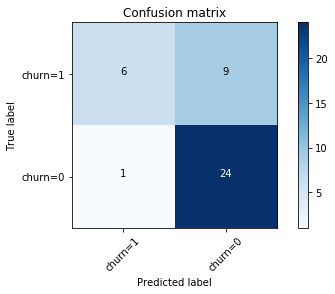

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Lets try jaccard index for accuracy:

In [34]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

## Modeling with Numpy

- Fitting using Gradient descent implemented by Gradient Descent
- Fitting using BFGS algorithm implemented by Scipy library
- Fitting using Stochastic Gradient Descent

### 1) Fitting using Gradient descent implemented by Gradient Descent
We should find the best parameters for our model by minimizing the cost function of our model. In other word to minimize J value that we just defined in __cost()__ function.

How to minimize the cost function? 

The answer is, using an optimization approach. There are different optimization approaches, but we use one of famous and effective approaches here, gradient descent.

What is gradient descent?
Generally, gradient descent  is an iterative approach to finding the minimum of a function. Specifically, in our case, gradient descent is a technique to use derivative of a cost function to change the parameter values, to minimize the cost/error. 

Lets see how it works.


As mentioned before, Sigmoid function’s output is always between 0 and 1, which make it proper to interpret the results as probabilities.
It is obvious that, when the outcome of sigma function get closer to 1, the probability of y=1, given x, goes up, and in contrast, when the sigmoid value is closer to zero, the probability of y=1, given x, is very small.
Here we define a function to compute the sigmoid of an input.


In [2]:
#Compute the sigmoid function
def sigmoid(z):
    s =  1.0 / (1.0 + np.exp(- z))
    return s

We have to compare the output of our model with the actual label of the customer. 
Then, record the difference as our model’s error for each customer. The total error (for all customers) is cost of your model, and is calculated by model’s cost function. The cost function, by the way, basically represents how to calculate the error of the model, which is the difference between actual and the model’s predicted values. 
However, Logistic regression, uses a specific cost function which penalizes situations in which the class is 0 and the model output is 1, and vice versa. It uses log-likelihood to form the cost function.

In [37]:
# computes cost given predicted and actual values
def cost_computation(theta, X, y):
    hx = sigmoid(np.dot(X, theta)) # predicted probability of label 1
    cost = (-y)* np.log(hx) - (1-y)*np.log(1-hx) # log-likelihood vector
    J = cost.mean()
    return J

Follow the curve by calculating the gradients or the first derivatives of the cost function with respect to each theta

In [38]:
def grad_computation(theta, X, y):
    hx = sigmoid(np.dot(X, theta))
    error = hx - y # difference between label and prediction
    grad = np.dot(error, X) / y.size # gradient vector
    return grad

This function predicts whether the label is 0 or 1 using learned logistic regression parameters

In [39]:
def predict_class(theta, X):
    m, n = X.shape
    p = np.zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p.reshape(m,)

In [40]:
def gradient_descent(x, y, theta, alpha, iterations):
#gradient descent algorithm to find optimal theta values
    theta_n = theta.size  
    for i in range(iterations):
        h = sigmoid(np.dot(x, theta))
        gradient_val = grad_computation(theta, x, y)
        theta= theta - alpha * gradient_val
        print('>iteration=%d, lrate=%.3f, cost=%.3f' % (i, alpha, cost_computation(theta, x, y)))
    return theta

we add 1 to as first value of each parameter vector, to play intrecept of the model.

In [43]:
X_train_1 = np.append( np.ones((X_train.shape[0], 1)), X_train, axis=1)
X_test_1 = np.append( np.ones((X_test.shape[0], 1)), X_test, axis=1)
X_train_1[0:5]

array([[ 1.  ,  1.09,  0.14, -0.75,  0.2 , -0.64,  1.32, -0.86],
       [ 1.  ,  0.86,  0.06, -1.15, -0.16,  0.92, -0.92,  1.16],
       [ 1.  ,  0.95,  0.91,  1.12,  0.19,  1.7 ,  0.42,  1.16],
       [ 1.  ,  1.55,  0.06,  1.12, -0.44,  0.14, -1.14,  1.16],
       [ 1.  ,  1.41,  0.68, -0.95,  2.01,  1.7 ,  1.54, -0.86]])

In [44]:
# prefix an extra column of ones to the feature matrix (for intercept term)
theta_0 = 0.1* np.random.randn(X_train_1.shape[1])
theta = gradient_descent(X_train_1, y_train, theta_0, 0.1, 100)

>iteration=0, lrate=0.100, cost=0.630
>iteration=1, lrate=0.100, cost=0.618
>iteration=2, lrate=0.100, cost=0.608
>iteration=3, lrate=0.100, cost=0.598
>iteration=4, lrate=0.100, cost=0.590
>iteration=5, lrate=0.100, cost=0.582
>iteration=6, lrate=0.100, cost=0.575
>iteration=7, lrate=0.100, cost=0.569
>iteration=8, lrate=0.100, cost=0.563
>iteration=9, lrate=0.100, cost=0.558
>iteration=10, lrate=0.100, cost=0.553
>iteration=11, lrate=0.100, cost=0.548
>iteration=12, lrate=0.100, cost=0.544
>iteration=13, lrate=0.100, cost=0.540
>iteration=14, lrate=0.100, cost=0.537
>iteration=15, lrate=0.100, cost=0.533
>iteration=16, lrate=0.100, cost=0.530
>iteration=17, lrate=0.100, cost=0.527
>iteration=18, lrate=0.100, cost=0.524
>iteration=19, lrate=0.100, cost=0.521
>iteration=20, lrate=0.100, cost=0.518
>iteration=21, lrate=0.100, cost=0.516
>iteration=22, lrate=0.100, cost=0.514
>iteration=23, lrate=0.100, cost=0.511
>iteration=24, lrate=0.100, cost=0.509
>iteration=25, lrate=0.100, cost=0.

### 2) Fitting using bfgs algorithm

Also, we can use __fmin_bfgs__ to minimize the cost function. __fmin_bfgs__  is a scipy built-in function which finds the best parameters theta for the logistic regression cost function given a fixed dataset.

In [17]:
theta = opt.fmin_bfgs(cost_computation, theta_0, fprime=grad_computation, args=(X_train_1, y_train))

Optimization terminated successfully.
         Current function value: 0.437695
         Iterations: 30
         Function evaluations: 31
         Gradient evaluations: 31


### 3) Fitting using Stochastic Gradient Descent

What if we estimate gradient with just one sample?  

Gradient Descent is the process of minimizing our cost function by following the gradients of the cost function. 

'Stochastic Gradient Descent' is an optimization algorithem where we update the coefficients of the model in every iteration to minimize the error of a model on the training data. The way this algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction.

#### Stochastic Gradient Descent
In this function we calculate the error for each prediction and update the theta accordingly. The error is calculated as the difference between the predication value and the actual label.

In [18]:
# Calculate h_theta -- Predictionof a row
def predict_row(row, theta):
    hx = sigmoid(np.dot(row, theta))
    return hx

In [19]:
# Estimate theta using stochastic gradient descent
def theta_sgd(X_train, y_train, alpha, n_epoch):
    theta = [0.0 for i in range(len(X_train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for x,y in zip(X_train_1,y_train):
            ht = predict_row(x, theta)
            error =  ht - y
            theta[0] = theta[0] - alpha * error 
            for i in range(len(theta)-1):
                theta[i + 1] = theta[i + 1] - alpha * error  * x[i+1]
        sum_error += error**2
        # cost computation
        cost = cost_computation(theta, X_train, y_train)
        print('>epoch=%d, lrate=%.3f, error=%.3f, cost=%.3f' % (epoch, alpha, sum_error,cost))
    return theta

In [20]:
theta = theta_sgd(X_train_1,y_train, 0.001, 100)

>epoch=0, lrate=0.001, error=0.263, cost=0.669
>epoch=1, lrate=0.001, error=0.274, cost=0.649
>epoch=2, lrate=0.001, error=0.283, cost=0.632
>epoch=3, lrate=0.001, error=0.292, cost=0.617
>epoch=4, lrate=0.001, error=0.299, cost=0.604
>epoch=5, lrate=0.001, error=0.305, cost=0.593
>epoch=6, lrate=0.001, error=0.310, cost=0.583
>epoch=7, lrate=0.001, error=0.314, cost=0.574
>epoch=8, lrate=0.001, error=0.318, cost=0.566
>epoch=9, lrate=0.001, error=0.321, cost=0.558
>epoch=10, lrate=0.001, error=0.324, cost=0.552
>epoch=11, lrate=0.001, error=0.326, cost=0.546
>epoch=12, lrate=0.001, error=0.328, cost=0.540
>epoch=13, lrate=0.001, error=0.329, cost=0.535
>epoch=14, lrate=0.001, error=0.331, cost=0.530
>epoch=15, lrate=0.001, error=0.332, cost=0.526
>epoch=16, lrate=0.001, error=0.332, cost=0.522
>epoch=17, lrate=0.001, error=0.333, cost=0.518
>epoch=18, lrate=0.001, error=0.333, cost=0.514
>epoch=19, lrate=0.001, error=0.333, cost=0.511
>epoch=20, lrate=0.001, error=0.333, cost=0.508
>e

In [46]:
pred = predict_class(np.array(theta), X_train_1)
#Compute accuracy on our training set
print ('Train Accuracy: %f' % ((y_train[(pred == y_train)].size / float(y_train.size)) * 100.0))

Train Accuracy: 78.125000


In [47]:
pred = predict_class(np.array(theta), X_test_1)
#Compute accuracy on our training set
print ('Test Accuracy: %f' % ((y_test[(pred == y_test)].size / float(y_test.size)) * 100.0))

Test Accuracy: 72.500000


## Regulization

There is a parameter, regulization, that is used for preventing over fitting. We can find the best regulization value using accuracy:

In [49]:
Regularization_Inv=[0.00001,0.1,1,100]
Length=len(Regularization_Inv)
mean_acc=np.zeros((Length))
std_acc=np.zeros((Length))
ConfustionMx=[];


for Reg,n in zip(Regularization_Inv,range(0,Length)):
    
    LR = LogisticRegression(C=Reg).fit(X_train,y_train)
    yhat=LR.predict(X_test)
    mean_acc[n]=np.mean(yhat==y_test);
    
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    ConfustionMx.append(confusion_matrix(yhat,y_test,labels=[1,0]))
mean_acc 

array([0.72, 0.72, 0.72, 0.72])

In [50]:
print( "The best accuracy for Logistic regression is", mean_acc.max()) 

The best accuracy was for Logistic regression 0.725


## Want to learn more?

You can take free [Machine learning with Python](https://cocl.us/DX0108EN_ML0101EN)course.

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/DX0108EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/DX0108EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/DX0108EN_DSX)


### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2017 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​